## Set Up

In [2]:
#!pip install -qr requirements.txt  # install dependencies (ignore errors)

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.
[Errno 2] No such file or directory: 'yolov5'
/home/ec2-user/SageMaker/Hazardous_OT/yolov5


In [10]:
%cd '/home/ec2-user/SageMaker/Hazardous_OT/yolov5'

/home/ec2-user/SageMaker/Hazardous_OT/yolov5


In [19]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


## Inference and loading weights of Yolo V5 version
with image test from Ultralytics

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images/', update=False, view_img=False, weights=['yolov5l.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... 
Model Summary: 335 layers, 4.78187e+07 parameters, 0 gradients
image 1/2 /home/ec2-user/SageMaker/Hazardous_OT/yolov5/inference/images/bus.jpg: 416x352 4 persons, 1 buss, Done. (0.088s)
image 2/2 /home/ec2-user/SageMaker/Hazardous_OT/yolov5/inference/images/zidane.jpg: 288x416 2 persons, 1 ties, Done. (0.071s)
Results saved to inference/output
Done. (0.497s)


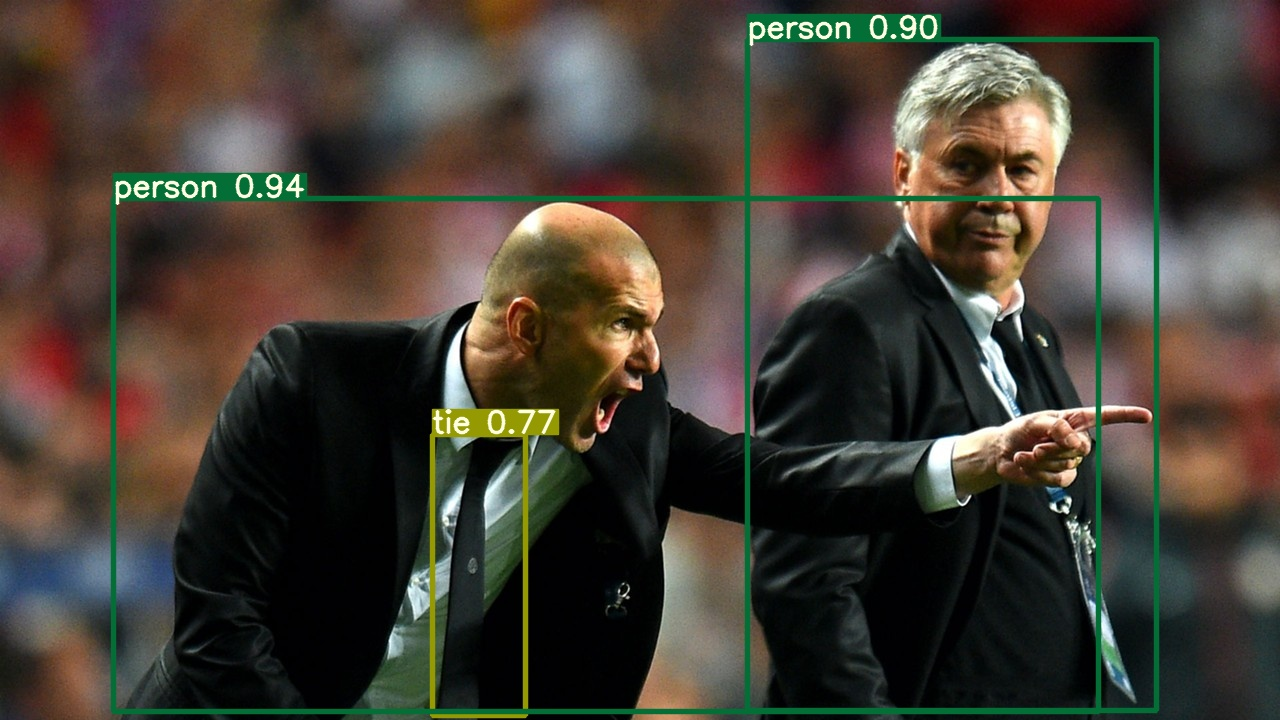

In [20]:
!python detect.py --weights yolov5l.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

## Training Yolov5 on synthetic datasets: Carbon debris (1 class only)

In [21]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6320), started 3:18:55 ago. (Use '!kill 6320' to kill it.)

In [27]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 512 --batch 16 --epochs 3 --data debris.yaml --cfg yolov5l.yaml --weights yolov5l.pt --nosave --cache

Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5l.yaml', data='./data/debris.yaml', device='', epochs=3, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[512, 512], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5l.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale':